In [ ]:
# https://openmv.net/info/travel-times

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/travel-times.csv')
df.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NaN,36.8,35.0,No,NaN
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,-,37.2,35.3,No,NaN
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,-,37.9,34.3,No,NaN
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.89,39.3,36.0,No,NaN
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.89,43.5,39.3,No,NaN


In [ ]:
df = df[df['FuelEconomy'] != '-']

In [ ]:
df.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NaN,36.8,35.0,No,NaN
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.89,39.3,36.0,No,NaN
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.89,43.5,39.3,No,NaN
10,12/22/2011,08:16,Thursday,GSK,49.15,129.4,74.0,81.4,8.89,39.8,36.2,No,NaN
11,12/21/2011,07:45,Wednesday,GSK,51.77,124.8,71.7,78.9,8.89,43.3,39.4,No,NaN


In [ ]:
df.drop(['Date', 'StartTime'], axis =1)

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
200,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes,NaN
202,Wednesday,Home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,Tuesday,Home,53.28,125.8,61.6,87.6,NaN,51.9,36.5,Yes,NaN


In [ ]:
df.isnull().mean()
# gives percentage of null values in particular column

Date              0.000000
StartTime         0.000000
DayOfWeek         0.000000
GoingTo           0.000000
Distance          0.000000
MaxSpeed          0.000000
AvgSpeed          0.000000
AvgMovingSpeed    0.000000
FuelEconomy       0.083744
TotalTime         0.000000
MovingTime        0.000000
Take407All        0.000000
Comments          0.881773
dtype: float64

# deletion of rows with missing data


In [ ]:
remove_na_rows = df.dropna(axis = 0)
print(remove_na_rows.shape)
print(df.shape)

(23, 13)
(203, 13)


# Mean/Median imputation


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['FuelEconomy']])
data = imputer.transform(df[['FuelEconomy']])
for i in range(0, 10):
  print(data[i])

[8.6905914]
[8.6905914]
[8.6905914]
[8.6905914]
[8.6905914]
[8.6905914]
[8.89]
[8.89]
[8.89]
[8.89]


In [ ]:
median_fuelEconomy = df['FuelEconomy'].median()
print(df['FuelEconomy'].fillna(median_fuelEconomy))

0      8.52
1      8.52
2      8.52
3      8.52
4      8.52
       ... 
200    7.89
201    7.89
202    8.52
203    8.52
204    8.52
Name: FuelEconomy, Length: 203, dtype: object


In [ ]:
# Mode imputation, Arbitrary value imputation

# list comprehension to get all categorical variables
cat_variables = [ var for var in df.columns if len(df[var].unique()) < 10]
cat_variables

['DayOfWeek', 'GoingTo', 'Take407All']

# Mode imputation / frequent category Imputation


In [ ]:
mode_comments = df['Comments'].mode()
print(df['Comments'].fillna(mode_comments[0]))

0      Backed up at Bronte
1      Backed up at Bronte
2      Backed up at Bronte
3      Backed up at Bronte
4      Backed up at Bronte
              ...         
200    Backed up at Bronte
201    Backed up at Bronte
202    Backed up at Bronte
203    Backed up at Bronte
204    Backed up at Bronte
Name: Comments, Length: 203, dtype: object


# Arbitrary value imputation from values in column


In [ ]:
print(df['Comments'].fillna('Rain, rain, rain'))

0      Rain, rain, rain
1      Rain, rain, rain
2      Rain, rain, rain
3      Rain, rain, rain
4      Rain, rain, rain
             ...       
200    Rain, rain, rain
201    Rain, rain, rain
202    Rain, rain, rain
203    Rain, rain, rain
204    Rain, rain, rain
Name: Comments, Length: 203, dtype: object


# Random Sample Imputation / Add a new Cateogory as missing

In [ ]:
print(df['Comments'].fillna('Missing'))

0      Missing
1      Missing
2      Missing
3      Missing
4      Missing
        ...   
200    Missing
201    Missing
202    Missing
203    Missing
204    Missing
Name: Comments, Length: 203, dtype: object


In [ ]:
# fuelEconomy is numerical column
# df['FuelEconomy']
#compute the mean of Boolean mask (True evaluates as 1 and False as 0)
na_variables = [ var for var in df.columns if df[var].isnull().mean() > 0 ]
na_variables

['FuelEconomy', 'Comments']

In [ ]:
# list comprehension to get all numerical variables
num_variables = [ var for var in df.columns if len(df[var].unique()) > 10]
num_variables

['Date',
 'StartTime',
 'Distance',
 'MaxSpeed',
 'AvgSpeed',
 'AvgMovingSpeed',
 'FuelEconomy',
 'TotalTime',
 'MovingTime',
 'Comments']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regressor = LinearRegression()  
X = np.array(df['Distance']).reshape(-1, 1)
y = np.array(df['TotalTime']).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.10012320371123562


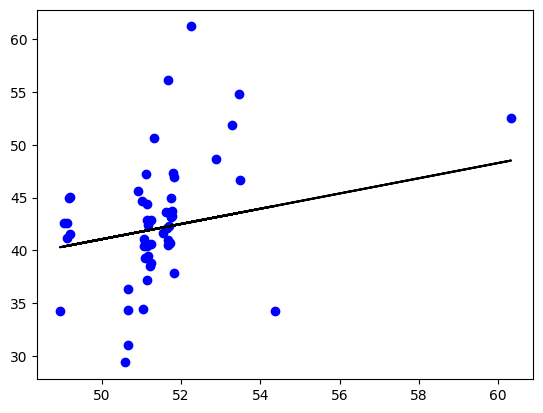

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

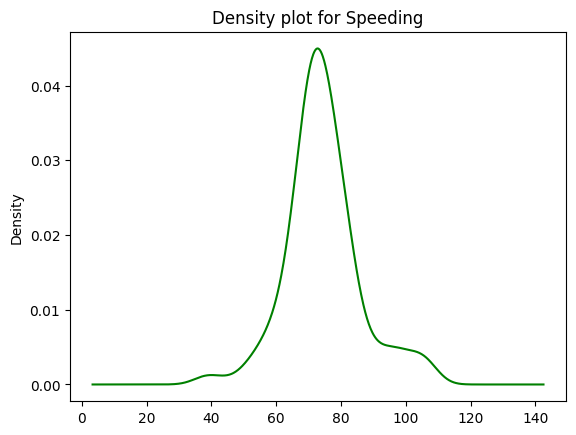

In [ ]:
df['AvgSpeed'].plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()